In [1]:
import pandas as pd
import os
from pandas import set_option
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
set_option('precision',3)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
PATH = os.path.join(os.getcwd(),"movies")

In [5]:
PATH

'C:\\Users\\Nguyen\\Desktop\\541\\movies'

In [6]:
data = pd.read_csv(f"{PATH}\\movies_metadata.csv")

### snapshot of the dataset with feature columns

In [7]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.02,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.86,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.39,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


### we decided to drop of the columns that we think have little to no impact on the train model

In [8]:
data_droppedv1 = data.drop(columns = ['homepage','tagline','belongs_to_collection','imdb_id','overview','poster_path','status'])
data_droppedv1.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,False,7.70,5415.00
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.02,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,False,6.90,2413.00
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.71,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,False,6.50,92.00
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.86,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,False,6.10,34.00
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.39,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,False,5.70,173.00


### saved the dataframe with columns dropped

In [9]:
data_droppedv1.to_csv("df_dropv1.csv",index=False)

In [10]:
df = pd.read_csv("df_dropv1.csv")
df.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,False,7.70,5415.00
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.02,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,False,6.90,2413.00
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.71,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,False,6.50,92.00
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.86,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,False,6.10,34.00
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.39,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,False,5.70,173.00


### the info() function gives us a overview of all the columns type and None count

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   original_language     45455 non-null  object 
 5   original_title        45466 non-null  object 
 6   popularity            45461 non-null  object 
 7   production_companies  45463 non-null  object 
 8   production_countries  45463 non-null  object 
 9   release_date          45379 non-null  object 
 10  revenue               45460 non-null  float64
 11  runtime               45203 non-null  float64
 12  spoken_languages      45460 non-null  object 
 13  title                 45460 non-null  object 
 14  video                 45460 non-null  object 
 15  vote_average       

### we looked at the number of null/NaN values in our columns features. As you can see here, it account for less than 1% of the entire dataset

In [12]:
df.isnull().sum()

adult                     0
budget                    0
genres                    0
id                        0
original_language        11
original_title            0
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
title                     6
video                     6
vote_average              6
vote_count                6
dtype: int64

### dropped null values

In [13]:
df = df.dropna(axis=0)

In [14]:
df.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

### notice how budget feature column is an object type and should be float

In [15]:
df['budget'] = df.budget.astype(float)

### describe() gives us the mean, standard deviation, quantiles of all the numeric feature columns. looking at the budget and revenue feature column, we can observe that the Q1,Q2,Q3 are all zero. this mean there are a lot of zeroes in the column, which mean the budget and revenue of more than 75% of the movie dataset is zero or "missing"

In [16]:
df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,45119.00,45119.00,45119.00,45119.00,45119.00
mean,4256257.31,11293985.18,94.19,5.64,110.71
std,17486591.73,64567503.30,38.34,1.90,493.07
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,85.00,5.00,3.00
50%,0.00,0.00,95.00,6.00,10.00
75%,0.00,0.00,107.00,6.80,35.00
max,380000000.00,2787965087.00,1256.00,10.00,14075.00


In [17]:
interesting_col = ['budget','revenue','runtime','vote_average','vote_count']

In [18]:
correlations = df.corr(method='pearson')
correlations

,budget,revenue,runtime,vote_average,vote_count
budget,1.00,0.77,0.13,0.07,0.68
revenue,0.77,1.00,0.10,0.08,0.81
runtime,0.13,0.10,1.00,0.16,0.11
vote_average,0.07,0.08,0.16,1.00,0.12
vote_count,0.68,0.81,0.11,0.12,1.00


### looking at the heatmap upper left, right and lower left corner we can observe there are some high correlation going on among the feature columns. the highest being 0.81 is between revenue and vote_count feature col.

<AxesSubplot:>

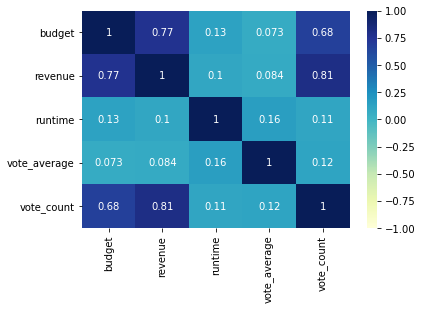

In [19]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu',annot = True)

### looking at the density plot for budget and revenue column, we can see that there are huge number of zeroes in both feature column and this is something we need to address going forward.

<AxesSubplot:ylabel='Density'>

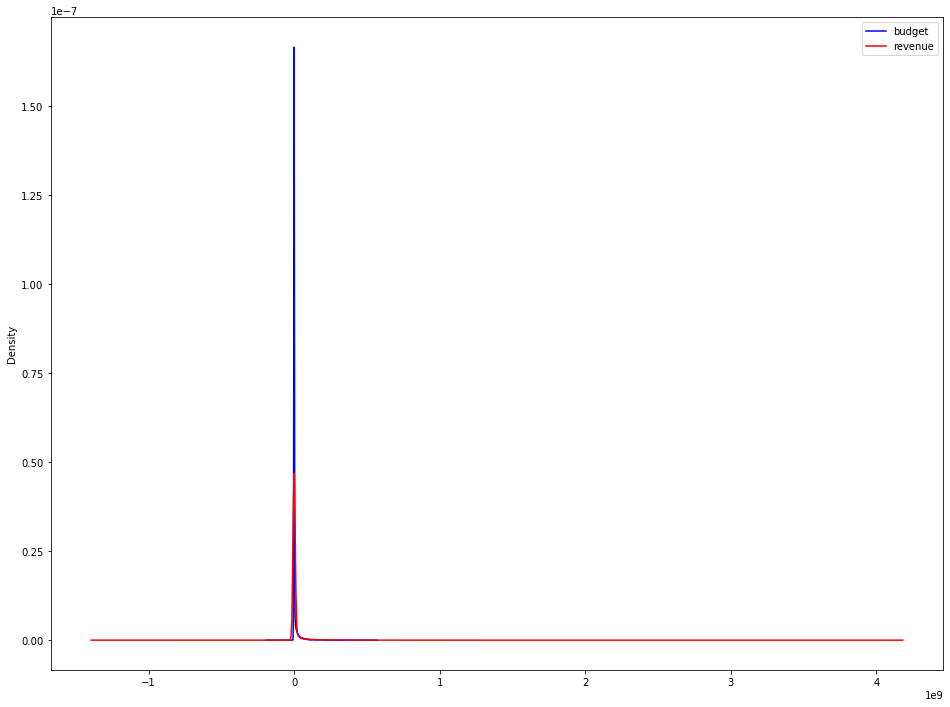

In [20]:
df.plot(df.index.name,['budget','revenue'],kind='density',color={"budget": "blue", "revenue": "red"},figsize=(16,12))

<AxesSubplot:ylabel='Density'>

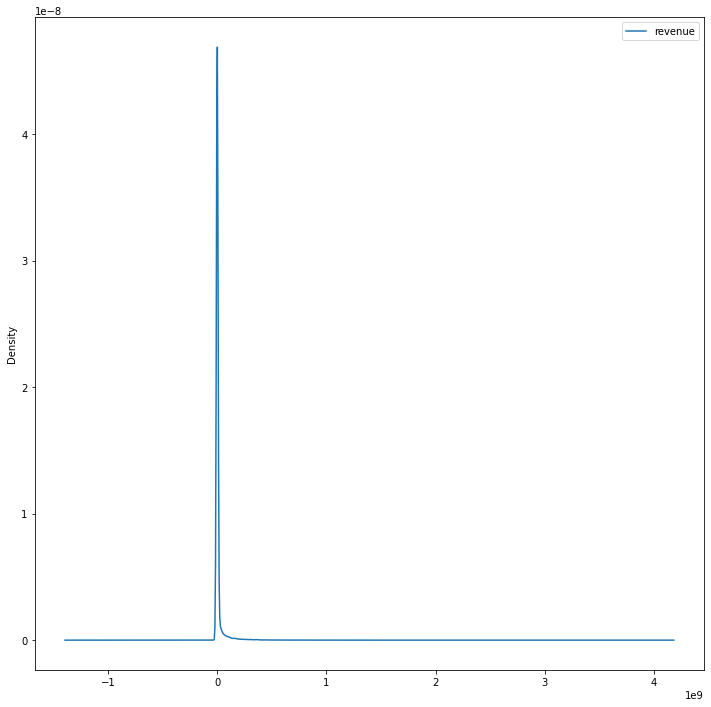

In [21]:
df.plot(df.index.name,['revenue'],kind='density',figsize=(12,12))

### looking at the boxplot, everything seem normal except once again for the budget and revenue columns since there are so many zeroes in the columns, every other non-zero values are seen as outliers. again this is a problem that need to be deal with moving forward.

<AxesSubplot:>

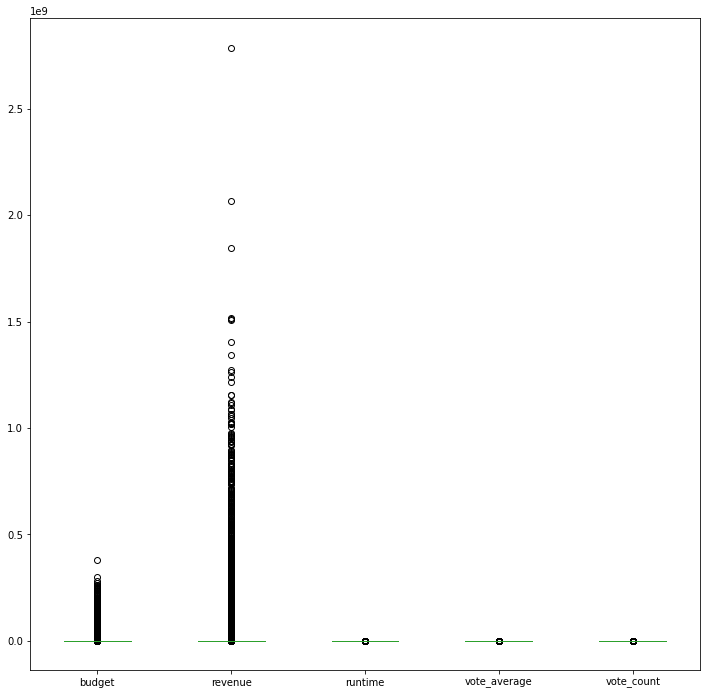

In [22]:
df.plot(df.index.name,interesting_col,kind='box',figsize=(12,12))

### looking at the scatter plot of the highest correlated feature col, we observe the big clump at the origin because of the unusual high number of zeroes in the colum of revenue. Otherwise this scatter plot indicate a positively correlated relationship between vote_count and revenue.

<AxesSubplot:xlabel='vote_count', ylabel='revenue'>

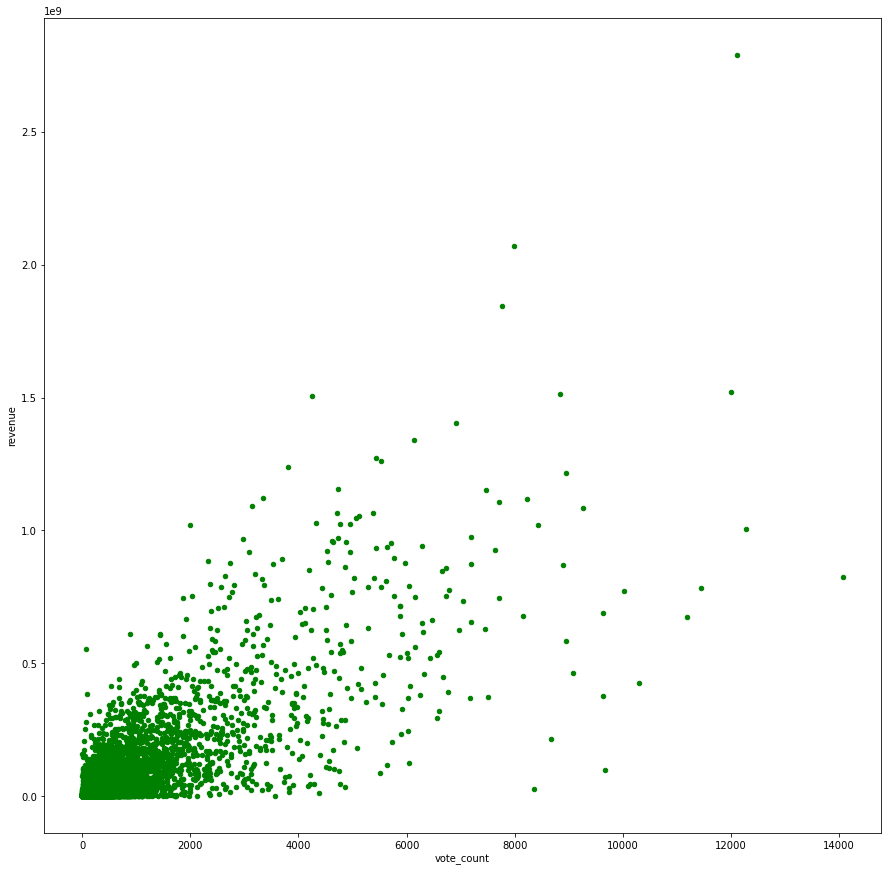

In [23]:
df.plot(x='vote_count',y='revenue',kind='scatter',color='green',figsize=(15,15))

In [24]:
#sns.pairplot(df[interesting_col],kind='scatter')

In [25]:
df.to_csv('new_df.csv',index=False)